# Лабораторная работа №2. Облигации

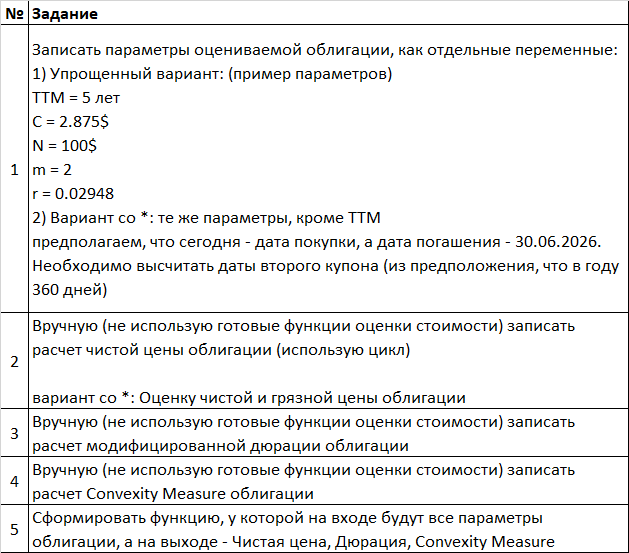

In [ ]:
from datetime import datetime

C = 2.875
N = 100
m = 2
r = 0.02948
# t_final = datetime.strptime('2026-06-30', "%Y-%m-%d")
# t_today = datetime.today()
TTM = 5

In [ ]:
# t_final-t_today

### Цена облигации

In [ ]:
bond_price = 0
for i in range(1, TTM*m+1):
  bond_price += (C/m)/((1+r/m)**float(i))
bond_price += N/((1+r/m)**float(TTM*m))
print(f"Bond price is: {round(bond_price, 2)}$")

Bond price is: 99.66$


### Дюрация

In [ ]:
modified_duration = -1/(1+r/m)

makoley = 0
for i in range(1, TTM*m+1):
  makoley += (i*C/m)/((1+r/m)**float(i))
makoley -= N*TTM*m/((1+r/m)**float(TTM*m))

modified_duration *= makoley/bond_price
print(f"Modified duration: {round(modified_duration, 2)} years")

Modified duration: 7.84 years


### Convexity measure

In [ ]:
convexity_measure = 1

cm = 0
for i in range(1, TTM*m+1):
  cm += (-i)*(-(i+1))*(C/m)/((1+r/m)**float(i+2))
cm += (-TTM*m)*(-(TTM*m+1))*N/((1+r/m)**float(TTM*m+2))

convexity_measure = convexity_measure/bond_price

print(f"Convexity measure: {round(convexity_measure,5)}")

Convexity measure: 0.01003


### Полная функция

In [ ]:
def bond_calc(C, n, m, r, TTM):
  # расчет цены облигации + цикл для дюрации и convexity
  bond_price = 0
  makoley = 0
  cm = 0

  for i in range(1, TTM*m+1):
    bond_price += (C/m)/((1+r/m)**float(i))
    makoley += (i*C/m)/((1+r/m)**float(i))
    cm += (-i)*(-(i+1))*(C/m)/((1+r/m)**float(i+2))
  bond_price += N/((1+r/m)**float(TTM*m))
  
  # расчет дюрации
  modified_duration = -1/(1+r/m)
  makoley -= N*TTM*m/((1+r/m)**float(TTM*m))
  modified_duration *= makoley/bond_price

  # расчет convexity measure
  cm += (-TTM*m)*(-(TTM*m+1))*N/((1+r/m)**float(TTM*m+2))
  convexity_measure = convexity_measure/bond_price

  return bond_price, modified_duration, convexity_measure

Попробуем реализовать то же самое для известной даты погашения

In [ ]:
t_final = datetime.strptime('2026-06-30', "%Y-%m-%d")
t_today = datetime.today()

TTM = round((t_final-t_today).days/360,1)
print(TTM)

3.4


Посчитаем, когда платятся купоны

In [46]:
import datetime

t_coupon = t_final
print(t_coupon)
while t_coupon>t_today:
  t_coupon = t_coupon - datetime.timedelta(days=180)
  print(t_coupon)

2026-06-30 00:00:00
2026-01-01 00:00:00
2025-07-05 00:00:00
2025-01-06 00:00:00
2024-07-10 00:00:00
2024-01-12 00:00:00
2023-07-16 00:00:00
2023-01-17 00:00:00


Следующий купон будет выплачен 2023-07-16, а предыдущий был 2023-01-17, расчитаем НКД:

In [49]:
from datetime import datetime

t_coupon = '2023-07-16'
t_coupon_1 = '2023-01-17'

t_0 = '2023-02-18'
t0 = datetime.strptime(t_0, "%Y-%m-%d")
tc = datetime.strptime(t_coupon, "%Y-%m-%d")
tc_1 = datetime.strptime(t_coupon_1, "%Y-%m-%d")

accured_interest = С * (t0-tc_1).days / (tc-tc_1).days
print(f'Accured intserest is USD {round(accured_interest, 2)}')

Accured intserest is USD 0.51


Сначала расчитаем чистую цену облигации

In [51]:
def bond_price(N, TTM, r, C, m):
        m   = float(m)
        periods = TTM*m
        coupon   = C/100.*N/m # size of coupon payment
        dt = [(i+1)/m for i in range(int(periods))] # vector with future cash flow payment periods 
        price = sum([coupon/(1+r/m)**(m*t) for t in dt]) + N/(1+r/m)**(m*TTM)
        return price

price_clear = bond_price(N, TTM, r, C, m)
print(f"Clear price is: {round(price_clear, 2)}$")

Clear price is: 98.73$


А с НКД грязная стоимость облигации:

In [52]:
 dirty_price = price_clear+accured_interest
 print(f"Dirty Bond price is: {round(dirty_price, 2)}$")

Dirty Bond price is: 99.24$
